# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
len(pd.unique(combined_data["Mouse ID"]))

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_data[combined_data.duplicated()]



In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatevalue_df = combined_data[(combined_data["Mouse ID"] == "g989")]
duplicatevalue_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[(combined_data["Mouse ID"] != "g989")]
clean_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(clean_df["Mouse ID"]))

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean_tumor_volume = clean_df.groupby(["Drug Regimen"]).mean()['Tumor Volume (mm3)']
Median_tumor_volume = clean_df.groupby(["Drug Regimen"]).median()['Tumor Volume (mm3)']
Var_tumor_volume = clean_df.groupby(["Drug Regimen"]).var()['Tumor Volume (mm3)']
Std_tumor_volume = clean_df.groupby(["Drug Regimen"]).std()['Tumor Volume (mm3)']
Sem_tumor_volume = clean_df.groupby(["Drug Regimen"]).sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.DataFrame({"Mean Tumor Volume" : Mean_tumor_volume,
                              "Median Tumor Volmue" : Median_tumor_volume,
                              "Tumor Volume Variance" : Var_tumor_volume,
                              "Tumor Volume Std" : Std_tumor_volume,
                              "Tummor Volume Error" : Sem_tumor_volume
})

summary_table

,Mean Tumor Volume,Median Tumor Volmue,Tumor Volume Variance,Tumor Volume Std,Tummor Volume Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:

# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(Mean_Tumor_Volume = ('mean'), 
                                                           Median_Tumor_Volume = ('median'),
                                                           Tumor_Volume_Variance = ('var'),
                                                           Tumor_Volume_stdev = ('std'),
                                                           Tumor_Volume_SEM = ('sem')
                                                          
                                                          
                                                          )


,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_stdev,Tumor_Volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

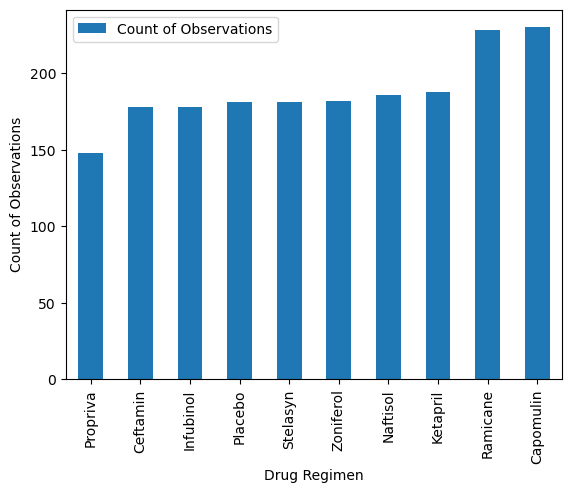

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
obs = clean_df.groupby(["Drug Regimen"]).count()['Mouse ID'].sort_values()
count_by_drug = pd.DataFrame({"Count of Observations": obs})
count_by_drug.reset_index
count_by_drug.sort_values("Count of Observations")
count_by_drug.plot(kind = "bar",use_index=True)

#add y-axis label
plt.ylabel("Count of Observations")

plt.show()

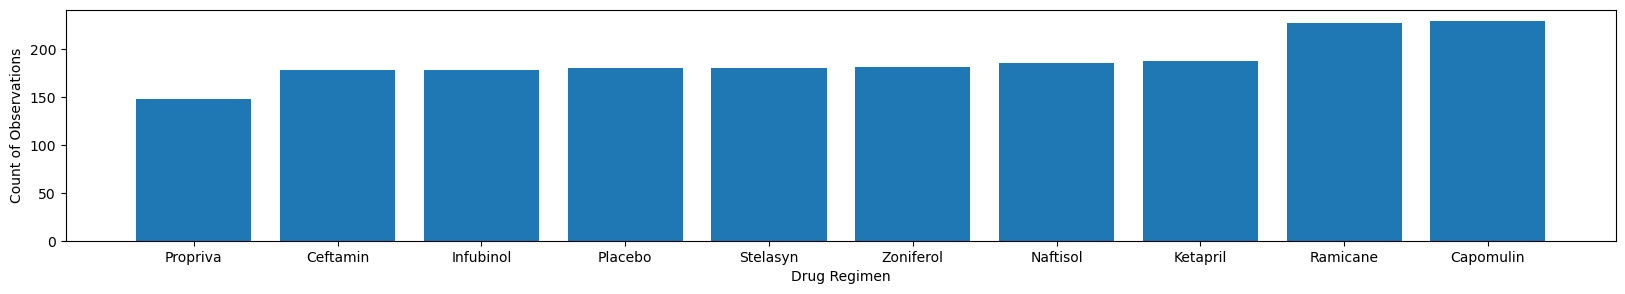

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
obs = clean_df.groupby(["Drug Regimen"]).count()['Mouse ID'].sort_values().reset_index()
x_axis = obs['Drug Regimen']
y_axis=count_by_drug["Count of Observations"]

plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, align ="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Observations")
plt.show()



Text(0.5, 1.0, 'Count of mice by Sex (%)')

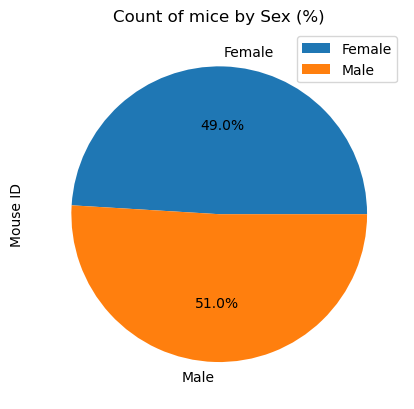

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_v_female = clean_df.groupby("Sex").count().reset_index()

male_v_female_pie = male_v_female.plot(kind="pie", y= "Mouse ID", autopct="%1.1f%%", labels = male_v_female["Sex"])

plt.title("Count of mice by Sex (%)")



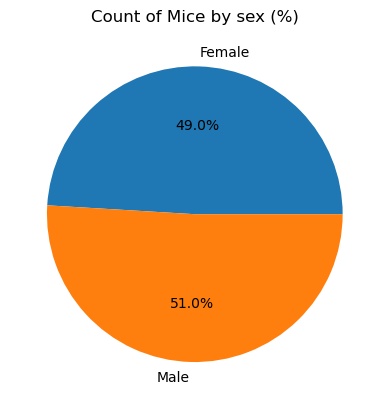

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
py_malevfemale = plt.pie(male_v_female["Mouse ID"], labels = male_v_female["Sex"], autopct="%1.1f%%")

plt.title("Count of Mice by sex (%)")
plt.show()




## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID').max()["Timepoint"].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_merge = pd.merge(last_timepoint, clean_df, on=["Mouse ID", "Timepoint"])


In [15]:
final_timepoint_merge.columns

Index(['Mouse ID', 'Timepoint', 'Drug Regimen', 'Sex', 'Age_months',
       'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [16]:
# Put treatments into a list for  for loop (and later for plot labels)
treament_names = ['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treament_names:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    x = final_timepoint_merge.loc[final_timepoint_merge['Drug Regimen'] == drug , 'Tumor Volume (mm3)']
    
    
    # add subset 
    tumor_volume.append(x)
    
    # Determine outliers using upper and lower bounds
    quartiles = x.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_tumor = x.loc[ (x < lower_bound) | (x > upper_bound)]
    print(outlier_tumor)

    

31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)


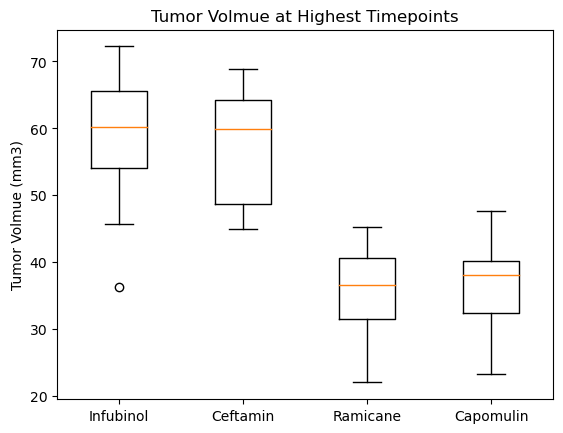

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, treatment_end = plt.subplots()
treatment_end.set_title('Tumor Volmue at Highest Timepoints')
treatment_end.set_ylabel('Tumor Volmue (mm3)')
treatment_end.boxplot(tumor_volume)
plt.xticks([1,2,3,4],treament_names)

plt.show()


## Line and Scatter Plots

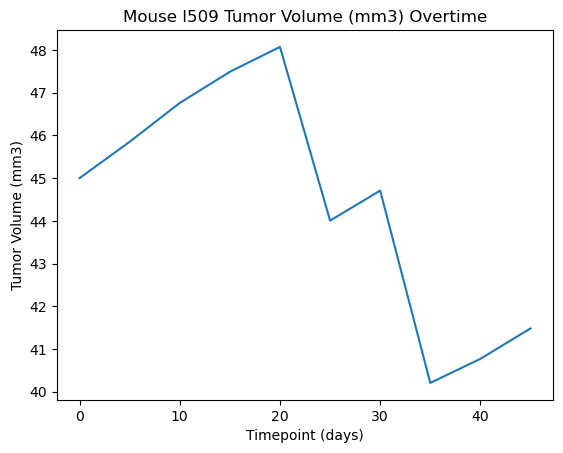

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Filter for mouse treated on capomulin
cap_df = clean_df[clean_df["Drug Regimen"] == 'Capomulin']
#Using Mouse ID s185
l509_df = cap_df[cap_df['Mouse ID'] == 'l509']

plt.plot(l509_df['Timepoint'],l509_df['Tumor Volume (mm3)'])

#Adding plot labels:
plt.title("Mouse l509 Tumor Volume (mm3) Overtime")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')


plt.show()




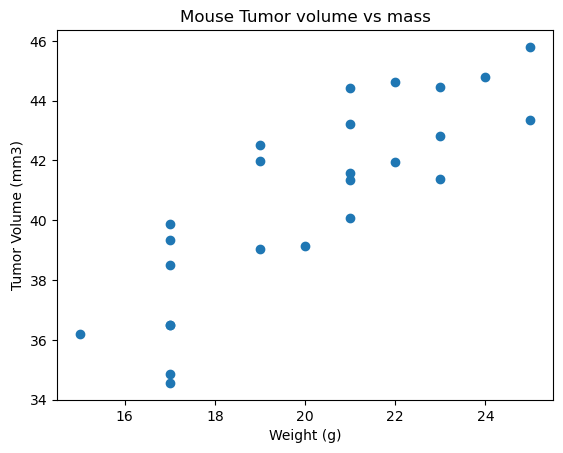

In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_weight= cap_df.groupby('Mouse ID').mean().reset_index()

plt.scatter(avg_weight['Weight (g)'], avg_weight['Tumor Volume (mm3)'])

#adding Titles/labels
plt.title('Mouse Tumor volume vs mass')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()


## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_weight['Weight (g)']
y_values = avg_weight['Tumor Volume (mm3)']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between the weight of the mouse and the volmue of the tumor is {round(correlation[0],2)}")






The correlation between the weight of the mouse and the volmue of the tumor is 0.84


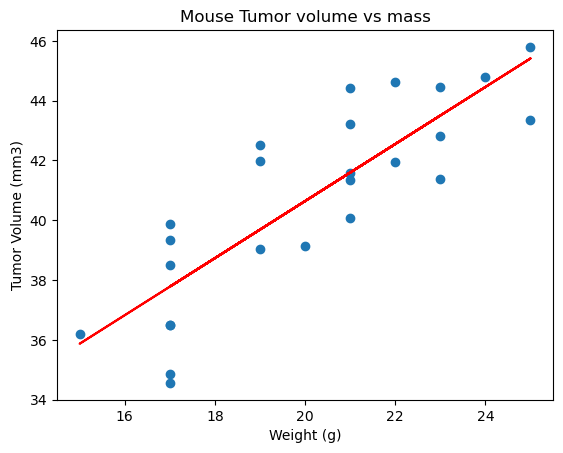

In [46]:
x_values = avg_weight['Weight (g)']
y_values = avg_weight['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values= x_values * slope + intercept

plt.scatter(avg_weight['Weight (g)'], avg_weight['Tumor Volume (mm3)'])
plt.plot(x_values, regress_values,"r-")
plt.title('Mouse Tumor volume vs mass')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()




